Datasets:

*   https://www.kaggle.com/code/ma00753045/tryon/notebook
*   https://www.kaggle.com/datasets/rkuo2000/viton-dataset

Papers:

*   https://www.arxiv-vanity.com/papers/1909.02165/
*   https://www.kdnuggets.com/2020/10/deep-learning-virtual-try-clothes.html

Live Implementation Tutorials:

* https://www.youtube.com/watch?v=csYkGeJ5bCM&list=WL&index=7&ab_channel=BrainMentorsPvtLtd
* https://www.youtube.com/watch?v=YjWh7QvVH60&ab_channel=TheAIGuy


In [1]:
import pandas as pd
import numpy as np

import os, sys
import json

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from random import randrange

In [2]:
is_run_first_time = False

In [3]:
%%time
# Train Directory

if is_run_first_time:

  !wget https://drive.google.com/file/d/1lHNujZIq6KVeGOOdwnOXVCSR5E7Kv6xv/view
  !gdown 1lHNujZIq6KVeGOOdwnOXVCSR5E7Kv6xv

  !unzip -q /content/ACGPN_traindata.zip -d Train_Dir

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 12.2 µs


In [4]:
%%time
# Test Directory

if is_run_first_time:

  !wget https://drive.google.com/file/d/1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR/view
  !gdown 1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR

  !unzip -q /content/Data_preprocessing.zip -d Test_Dir

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.4 µs


In [5]:
test_dir = '/content/Test_Dir'
train_dir = '/content/Train_Dir'

In [6]:
def get_dir_n_files(root_dir):

  """
  get number of files in a directory and all its subdirectories
  """

  dir_n_files = pd.DataFrame({'Directoy Path':[], 'Sub Directories':[], 'Number of Files':[]})

  for dir_path, dirs, files in os.walk(root_dir):
    dir_n_files = dir_n_files.append({'Directoy Path':dir_path, 'Sub Directories':dirs, 'Number of Files':len(files)}, ignore_index=True)

  dir_n_files['Number of Files'] = dir_n_files['Number of Files'].astype(int)

  return dir_n_files

In [7]:
# Check number of files and directories in test directory 

get_dir_n_files(test_dir)

,Directoy Path,Sub Directories,Number of Files
0,/content/Test_Dir,"[test_colormask, test_img, test_color, test_po...",0
1,/content/Test_Dir/test_colormask,[],10000
2,/content/Test_Dir/test_img,[],2032
3,/content/Test_Dir/test_color,[],2032
4,/content/Test_Dir/test_pose,[],2032
5,/content/Test_Dir/test_mask,[],12000
6,/content/Test_Dir/test_label,[],2032
7,/content/Test_Dir/test_edge,[],2032


In [8]:
# Check number of files and directories in train directory 

get_dir_n_files(train_dir)

,Directoy Path,Sub Directories,Number of Files
0,/content/Train_Dir,"[train_colormask, train_pose, train_label, tra...",0
1,/content/Train_Dir/train_colormask,[],50000
2,/content/Train_Dir/train_pose,[],14221
3,/content/Train_Dir/train_label,[],14221
4,/content/Train_Dir/train_img,[],14221
5,/content/Train_Dir/train_color,[],14221
6,/content/Train_Dir/train_mask,[],12000
7,/content/Train_Dir/train_edge,[],14221


In [9]:
def get_file_paths_at_index(root_dir, index=0):

  """
  get a list of datapoints at an index from each sub directory
  """

  result_files = []
  for root, dirs, files in os.walk(root_dir):
      if files:
          result_files.append(root + '/' + sorted(files)[index])

  return sorted(result_files)

In [10]:
# Python3 program to swap elements
# at given positions
 
# Swap function
def swapPositions(list, pos1, pos2):
     
    # popping both the elements from list
    first_ele = list.pop(pos1)  
    second_ele = list.pop(pos2-1)
    
    # inserting in each others positions
    list.insert(pos1, second_ele) 
    list.insert(pos2, first_ele) 
     
    return list

In [11]:


def get_pose_keypoints(file_path):

  # Opening JSON file
  with open(file_path) as json_file:
      data = json.load(json_file)

      return data['people'][0]['pose_keypoints']

In [90]:
import cv2
from matplotlib import pyplot as plt

def visualize_dataset_imgs(root_dir, max_range, n_samples=3, figsize=(20, 12)):
 
  # create figure
  fig = plt.figure(figsize=figsize)
  
  # setting values to rows and column variables
  rows = n_samples
  columns = 7

  index = 0

  for row_num in range(rows):

    random_index = randrange(max_range)
    
    visualize_paths = get_file_paths_at_index(root_dir, random_index)

    pose_keypoints_path  = visualize_paths[-1]

    # removed pose column, bcz it needs image processing
    visualize_paths = visualize_paths[:-1]

    # swapped position of some columns to display images in better order
    visualize_paths = swapPositions(visualize_paths, 1, 4)
    visualize_paths = swapPositions(visualize_paths, 1, 2)
    visualize_paths = swapPositions(visualize_paths, 2, 3)
  
    img_read_array = []
    
    # create a dictionary containing read image data and image info
    for img_path in visualize_paths:
      
      # img_test = cv2.imread(img_path)
      img = {'img': mpimg.imread(img_path), 'img_name': img_path.split("/")[3], 'file_name': img_path.split("/")[4]}
      img_read_array.append(img)



    # display dictionary of images on a grid
    for img_read_data in img_read_array:

      index += 1

      fig.add_subplot(rows, columns, index,)

      # styling
      plt.rc('font', size=15) 
      # plt.rc('title', size=12)

      plt.imshow(img_read_data['img'])
      plt.title(img_read_data['file_name'], fontdict={'fontsize': 14})

      # remove axes on individual images
      plt.xticks([])
      plt.yticks([])

      
      if index%columns == 1:
        plt.ylabel(str(random_index))

      if row_num == rows-1:
        plt.xlabel(img_read_data['img_name'])


    # handle keypoints here and add img to img_read_array
    index += 1
    fig.add_subplot(rows, columns, index,)
    
    pose_keypoints_array = np.array(get_pose_keypoints(pose_keypoints_path)).reshape(-1, 3)

    pose_keypoints_img = img_read_array[2]['img']
    plt.imshow(pose_keypoints_img)

    # remove axes on individual images
    plt.xticks([])
    plt.yticks([])

    if row_num == rows-1:
        plt.xlabel(pose_keypoints_path.split("/")[3])
    
    i=0
    for x,y,z in pose_keypoints_array: 
        plt.plot(x, y, 'w.') # 'w.': color='white', marker='.'
        plt.text(x, y, str(i), color='r', fontsize=10)
        i+=1
    # plt.show()


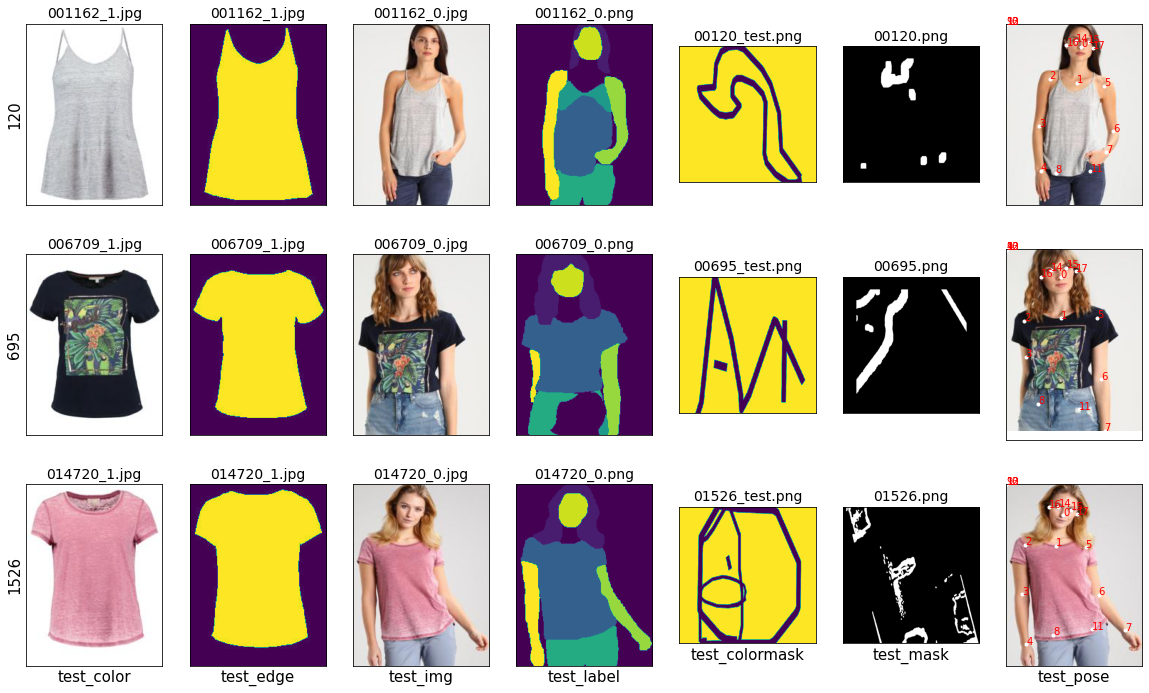

In [92]:
visualize_dataset_imgs(test_dir, 2032, 3, (20, 12))